# Machine Learning Approaches to Ethical Analysis of Statistics (ICS5110)

## Neural Network Model

Prompt:

```md
give me a tensorflow scaffolding that:
loads test, train, validate csvs from ./data
takes 7 features in a timeseries, with seasonality, across 12 months for 14 years
outputs a signal for an entire year
```

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

# Constants here
START_DATE = datetime(2008, 1, 1)
END_DATE = datetime(2022, 12, 31)
DATA_PATH = "./data"

train_df = pd.read_csv(f"{DATA_PATH}/train_data.csv", index_col=0, parse_dates=True)
test_df = pd.read_csv(f"{DATA_PATH}/test_data.csv", index_col=0, parse_dates=True)
validate_df = pd.read_csv(
    f"{DATA_PATH}/validate_data.csv", index_col=0, parse_dates=True
)

train_df.head(5)

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,powerplants_c02_kt,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2008-01-01,0.36,191.50,0.0,0.0,170.39,6.210000,409.379000,12.1,14.5,16.9
2008-02-01,0.37,183.60,0.0,0.0,163.36,6.214167,409.379000,10.5,13.3,16.1
2008-03-01,0.34,178.96,0.0,0.0,159.23,6.218333,409.637167,12.1,14.9,17.7
2008-04-01,0.32,172.61,0.0,0.0,153.58,6.222500,409.895333,13.9,17.4,20.9
2008-05-01,0.32,179.50,0.0,0.0,159.71,6.226667,410.153500,16.8,20.2,23.7


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = [
    "powerplants_c02_kt",
    "Plant_Production_GWh",
    "Population_k",
    "tmax",
    "GDP_bln",
]

X_train = train_df[features]
y_train = train_df["Plant_Production_GWh"]
y_test = test_df["Plant_Production_GWh"]
X_test = test_df[features]
y_validate = validate_df["Plant_Production_GWh"]
X_validate = validate_df[features]

X_train = np.array(X_train)
X_test = np.array(X_test)
X_validate = np.array(X_validate)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_validate = np.array(y_validate)


X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_validate = X_validate.reshape((X_validate.shape[0], 1, X_validate.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

model.fit(
    X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validate, y_validate)
)

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/50
4/4 [==============================] - 4s 254ms/step - loss: 35020.4727 - val_loss: 53496.8398
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 34971.1133 - val_loss: 53387.7305
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 34924.8398 - val_loss: 53305.9297
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 34889.8516 - val_loss: 53263.3203
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 34863.7188 - val_loss: 53224.3125
Epoch 6/50
4/4 [==============================] - 0s 56ms/step - loss: 34812.1172 - val_loss: 53146.0703
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 34755.8711 - val_loss: 53090.5039
Epoch 8/50
4/4 [==============================] - 0s 19ms/step - loss: 34722.7344 - val_loss: 53062.9453
Epoch 9/50
4/4 [==============================] - 0s 22ms/step - loss: 34687.8477 - val_loss: 53039.9727
Epoch 10/50
4/4 [==============================] - 0s 

1/1 [==============================] - 0s 39ms/step


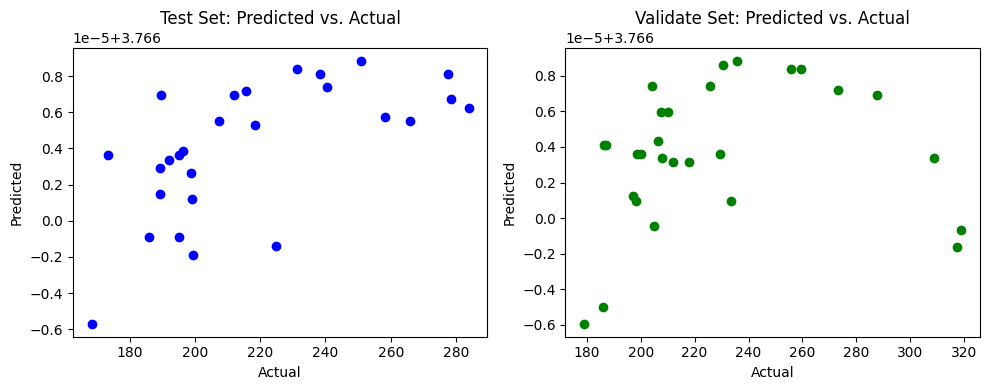

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
test_predictions = model.predict(X_test)
plt.scatter(y_test, test_predictions, color="blue")
plt.title("Test Set: Predicted vs. Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
validate_predictions = model.predict(X_validate)
plt.scatter(y_validate, validate_predictions, color="green")
plt.title("Validate Set: Predicted vs. Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# absolute mess!!!! include lag, ma, and all that
plt.tight_layout()
plt.show()